## Introduction

## Title: Analyzing the Nobel Prize Dataset: Unveiling Patterns and Insights

### Introduction:
The Nobel Prize stands as one of the most prestigious accolades awarded to individuals and organizations that have made exceptional contributions in various fields, including Physics, Chemistry, Medicine, Literature, Peace, and Economic Sciences. With a rich history spanning over a century, the Nobel Prize dataset offers a treasure trove of information that can be explored and analyzed to uncover valuable patterns, trends, and insights.

### Objective:
The objective of this data analysis project is to delve into the Nobel Prize dataset and extract meaningful information to gain a deeper understanding of the patterns and dynamics surrounding Nobel Prize laureates.

The analysis will begin by examining the demographic characteristics of Nobel laureates, including their nationalities, gender distribution, and age at the time of receiving the prize. I will explore how these factors have evolved over time and assess any significant shifts or trends.

Next, I will investigate the distribution of Nobel Prizes across different disciplines and identify the most frequent areas of recognition. By analyzing the affiliations of laureates, including universities, research institutions, and organizations, we can identify the key players and their contributions to the respective fields.

Furthermore, I will explore temporal patterns by analyzing the frequency of Nobel Prize awards over the years and identifying any notable variations or spikes in specific disciplines or geographical regions. This analysis will provide insights into the evolving landscape of scientific, literary, and peace achievements.

Through this data analysis, I anticipate uncovering intriguing insights into the Nobel Prize ecosystem. By analyzing demographic trends, disciplinary distributions, and temporal patterns, I aim to gain a comprehensive understanding of the factors that contribute to Nobel Prize recognition. This analysis may reveal hidden biases, identify underrepresented regions or fields, and highlight the impact of groundbreaking discoveries and contributions.

### Import libraries

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format
sns.set_theme(style="dark")

### Import the data

In [609]:
data = pd.read_csv('nobel.csv')
df=data.copy()
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [610]:
df.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


We can see that the dataset is from 1901 to 2020.

birth_country and birth_country_current give similar information so I will just keep the birth_country_current.

In [611]:
df=df.drop(['birth_country'], axis=1)

In [612]:
df.shape

(962, 15)

There are 962 rows and 12 columns in the dataset.

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country_current  934 non-null    object
 10  sex                    934 non-null    object
 11  organization_name      707 non-null    object
 12  organization_city      707 non-null    object
 13  organization_country   708 non-null    object
 14  ISO                    934 non-null    object
dtypes: int64(1), object(14)

### Date conversion

Since birth_date is an object, it needs to converted to pandas datetime

In [614]:
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country_current  934 non-null    object        
 10  sex                    934 non-null    object        
 11  organization_name      707 non-null    object        
 12  organization_city      707 non-null    object        
 13  organ

### Check for duplicates

In [616]:
print(f'Any duplicates? {df.duplicated().values.any()}')

Any duplicates? False


As expected, there are no duplicates.

In [617]:
df.describe()

,year,birth_date
count,962.00,934
mean,"1,971.82",1912-03-28 22:50:37.259100672
min,"1,901.00",1817-11-30 00:00:00
25%,"1,948.00",1892-04-06 00:00:00
50%,"1,977.00",1917-10-30 12:00:00
75%,"2,001.00",1937-04-24 18:00:00
max,"2,020.00",1997-07-12 00:00:00
std,33.81,NaN


### Find all nan values

In [618]:
nan_df = df.isna().sum()
nan_df

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

The Nobel Prize can be won by individuals and organizations. As expected, we have NA values in some columns especially when an individual is not affiliated to an organization or that an organization does not have sex.

### Add a Column with the Prize Share as a Percentage

I would like to convert the "prize_share" column from fractions to decimals. This conversion will allow me to analyze whether the sharing of prizes has increased in recent years.

In [619]:
seperated = df['prize_share'].str.split('/', expand=True)
num = pd.to_numeric(seperated[0])
denom = pd.to_numeric(seperated[1])
df['Share_pct'] = num/denom
df = df.drop(['prize_share'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   laureate_type          962 non-null    object        
 5   full_name              962 non-null    object        
 6   birth_date             934 non-null    datetime64[ns]
 7   birth_city             931 non-null    object        
 8   birth_country_current  934 non-null    object        
 9   sex                    934 non-null    object        
 10  organization_name      707 non-null    object        
 11  organization_city      707 non-null    object        
 12  organization_country   708 non-null    object        
 13  ISO  

### Donut Chart: Percentage of Male vs. Female Laureates

In [620]:
sex_pct = df['sex'].value_counts()

fig = px.pie(labels=sex_pct.index,
             values=sex_pct.values,
             title='Percentage of Male and Female Nobel Prize Winners from 1901 to 2020',
             names=sex_pct.index,
             hole=0.6
)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

### The first 5 Female winners and their information

In [621]:
df[df['sex']=='Female'].sort_values('year', ascending=True)[:5]

,year,category,prize,motivation,laureate_type,full_name,birth_date,birth_city,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,Share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,SWE,1.00
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Poland,Female,Sorbonne University,Paris,France,POL,1.00
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,ITA,1.00


### The Female Nobel Winners in Economics

In [622]:
df[(df['sex']=='Female') & (df['category']=='Economics')].sort_values('year', ascending=True)[:5]

,year,category,prize,motivation,laureate_type,full_name,birth_date,birth_city,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,Share_pct
819,2009,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for her analysis of economic governance, espe...",Individual,Elinor Ostrom,1933-08-07,"Los Angeles, CA",United States of America,Female,Indiana University,"Bloomington, IN",United States of America,USA,0.50
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,Individual,Esther Duflo,1972-10-25,Paris,France,Female,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FRA,0.33


### The last 5 Nobel Winners in Economics

In [623]:
df[df['category'] == 'Economics'].sort_values('year', ascending=False)[:5]

,year,category,prize,motivation,laureate_type,full_name,birth_date,birth_city,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,Share_pct
953,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,Individual,Robert B. Wilson,1937-05-16,"Geneva, NE",United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,0.50
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,0.50
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,Individual,Michael Kremer,1964-11-12,"New York, NY",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,0.33
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,Individual,Esther Duflo,1972-10-25,Paris,France,Female,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FRA,0.33
939,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,Individual,Abhijit Banerjee,1961-02-21,Mumbai,India,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,IND,0.33


### How many people won it more than once?

In [624]:
multiple_winners = df[df.duplicated(subset=['full_name'], keep=False)]
multiple_winners.full_name.nunique()

6

In [625]:
# Alternatively:
multiple_winners = df.groupby(by = 'full_name').filter(lambda x : x['year'].count() >= 2)
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


### Number of prizes per category

In [626]:
prizes_per_category = df['category'].value_counts()
prizes_per_category

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

In [627]:
cat_bar = px.bar(x = prizes_per_category.index,
               y = prizes_per_category.values,
               color = prizes_per_category.values,
                 color_continuous_scale='mygbm',
               title = 'Number of Prizes per category from 1901 to 2020'
)

cat_bar.update_layout(xaxis_title = 'Nobel Prize Category',
                      yaxis_title= 'Number of Prizes',
                     coloraxis_showscale=False)

cat_bar.show()

In [628]:
# Pie chart
fig = px.pie(labels=prizes_per_category.index,
             values=prizes_per_category.values,
             title='Number of Prizes per category from 1901 to 2020',
             names=prizes_per_category.index,
             hole=0.6
)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

### Male and Female Winners by Categories

In [629]:
sex_cat = df.groupby(['category', 'sex'],
                     as_index=False).agg({'prize': pd.Series.count})

sex_cat.sort_values('prize', ascending=False, inplace=True)
sex_cat

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [630]:
sex_cat_bar = px.bar(x = sex_cat['category'],
                    y = sex_cat['prize'],
                    color = sex_cat['sex'],
                    title = 'Male and Female Winners by Categories from 1901 to 2020')

sex_cat_bar.update_layout(xaxis_title='Nobel Prize Category',
                         yaxis_title='Number of Prizes')

sex_cat_bar.show()

### Number of Prizes Awarded Over Time

In [632]:
# Count the number of prizes awarded every year.
prize_per_year = df.groupby(by='year').count().prize

In [633]:
# a 5 year rolling average of the number of prizes
moving_avg = prize_per_year.rolling(window=5).mean()

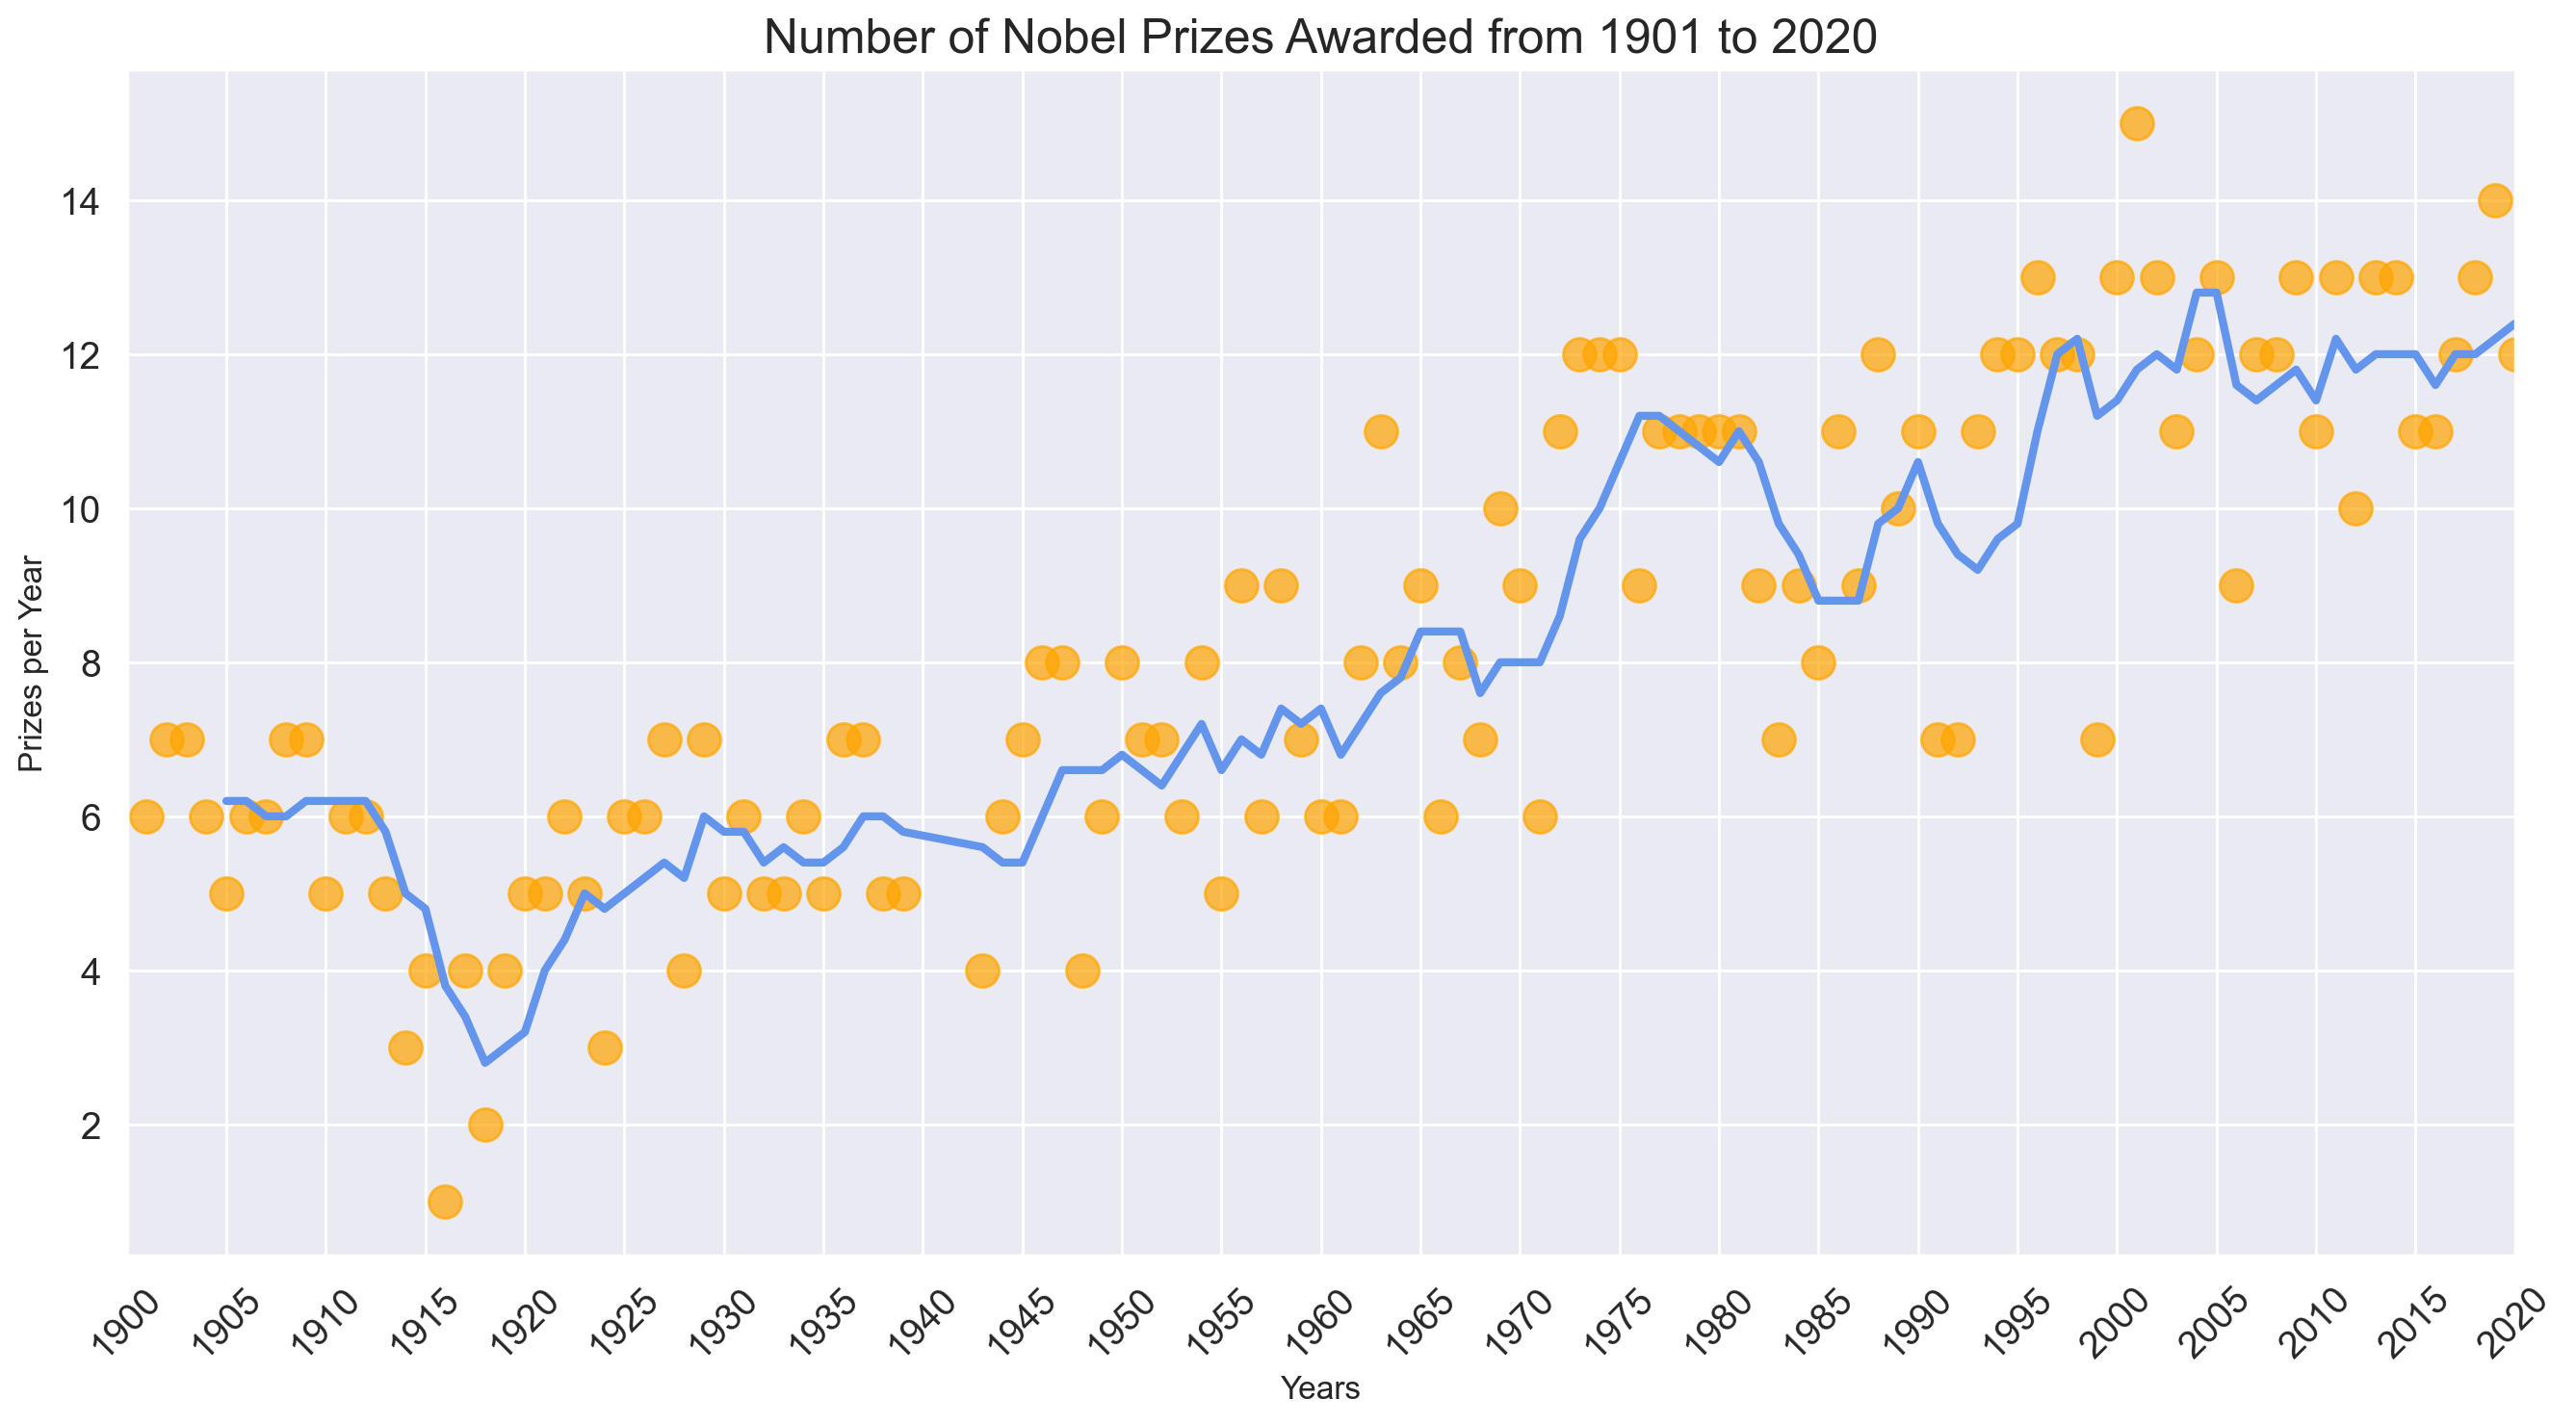

In [634]:
sns.set()
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded from 1901 to 2020', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2020)


plt.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='orange',
            alpha=0.7,
           s=150)

plt.plot(prize_per_year.index,
        moving_avg.values,
        c='cornflowerblue',
         linewidth=3)
plt.xlabel('Years')
plt.ylabel('Prizes per Year')

plt.show()

### Are More Prizes Shared now than Before?

In [635]:
yearly_avg_share = df.groupby(by='year').agg({'Share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

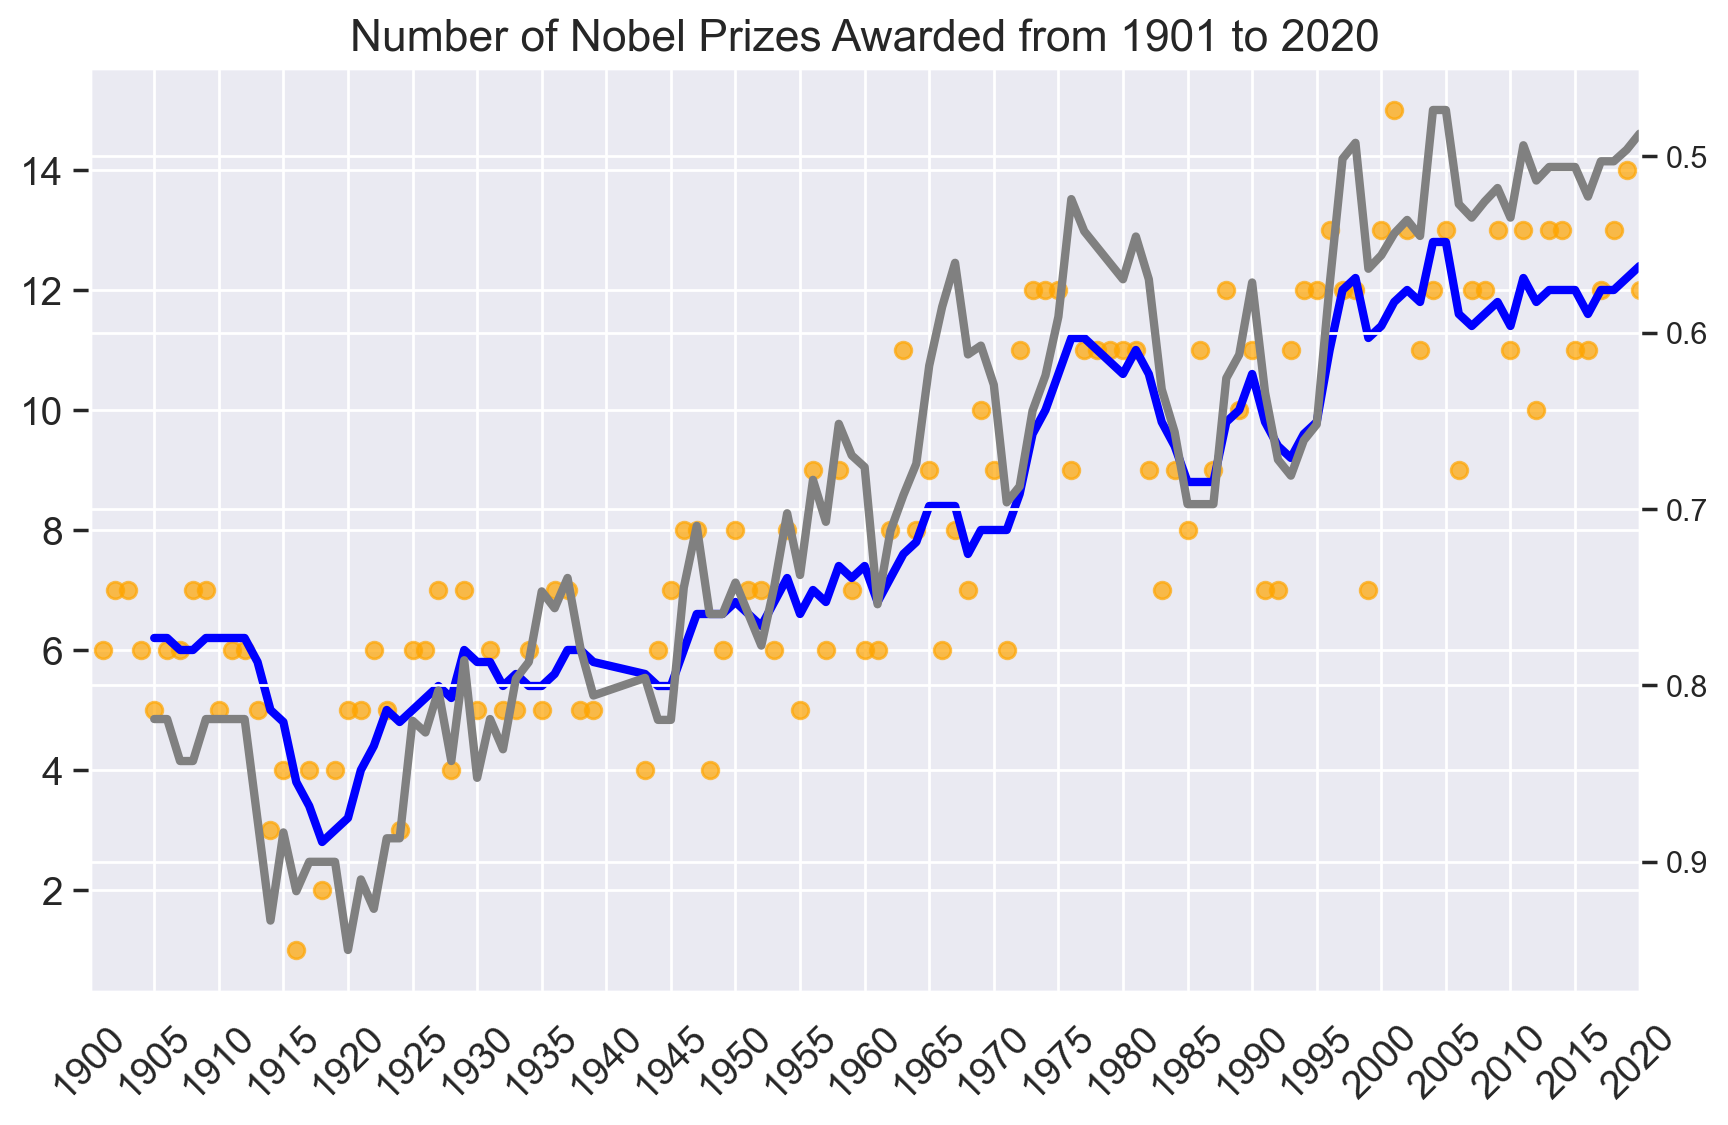

In [638]:
sns.set()
plt.figure(figsize=(10,6), dpi=200)
plt.title('Number of Nobel Prizes Awarded from 1901 to 2020', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
# We can invert axis of the second plot so we see the trend better
ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='orange',
            alpha=0.7)

ax1.plot(prize_per_year.index,
        moving_avg.values,
        c='blue',
         linewidth=3)

# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='gray', 
        linewidth=3)
plt.show()

The average number of prizes shared has been increasing. This means that more prizes are being shared in recent times.  

### The top 10 Countries with the Most Nobel Prizes

In [639]:
top10_countries = df.groupby(['birth_country_current'],
                           as_index=False).agg({'prize': pd.Series.count})
top10_countries.sort_values('prize', ascending=False)[:10]

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [640]:
top_countries = df.groupby(['birth_country_current'],
                           as_index=False).agg({'prize': pd.Series.count})
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

In [641]:
top20_var = px.bar(x=top20_countries['prize'],
                   y=top20_countries['birth_country_current'],
                  orientation='h',
                  color = top20_countries.prize,
                  color_continuous_scale = 'plotly3',
                  title='The 20 countries with the most Nobel Prizes')

top20_var.update_layout(xaxis_title='Number of Prizes',
                        yaxis_title='The top 20 countries',
                       coloraxis_showscale=False)
top20_var.show()

### A Choropleth Map of countries with the Nobel Prizes

In [642]:
countries = df.groupby(['birth_country_current', 'ISO'],
                       as_index=False).agg({'prize': pd.Series.count})
countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
40,Japan,JPN,27
57,Poland,POL,27
61,Russia,RUS,26
11,Canada,CAN,20
68,Switzerland,CHE,19


In [643]:
world_map = px.choropleth(countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.Rainbow,
                         title='Nobel Prizes by Countries')

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

### Countries and their wins in each category

In [644]:
wins_cat = df.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
wins_cat.sort_values(by='prize', ascending=False, inplace=True)
wins_cat.head()

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28


In [645]:
# Merge the above dataset with the dataset for the top 20 countries with more wins
merged_df = pd.merge(wins_cat, top20_countries, on='birth_country_current')
merged_df.head()

,birth_country_current,category,prize_x,prize_y
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281


In [646]:
merged_df.columns=['Country', 'Category', 'Cat_wins', 'Total_wins']
merged_df.sort_values(by='Total_wins', inplace=True)
merged_df.head()

,Country,Category,Cat_wins,Total_wins
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9


In [647]:
count_cat = px.bar(x=merged_df.Cat_wins,
                  y=merged_df.Country,
                  color = merged_df.Category,
                  orientation='h',
                  title='Countries and their wins in each category')
count_cat.update_layout(xaxis_title='Number of Prizes',
                        yaxis_title='Country')
count_cat.show()

### Number of Prizes Won by Each Country Over Time

In [649]:
prize_by_year = df.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year.head()

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1


In [650]:
cum_prizes = prize_by_year.groupby(by=['birth_country_current',
                                       'year']).sum().groupby(level=[0]).cumsum()
cum_prizes.reset_index(inplace=True)
cum_prizes.head()

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3


In [651]:
l_chart = px.line(cum_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')

l_chart.show()

### What are the Top Research Organisations?

In [652]:
top20_orgs = df['organization_name'].value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [653]:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.Rainbow,
                 title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

### Which Cities Make the Most Discoveries? 

In [654]:
top20_org_cities = df['organization_city'].value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Rainbow,
                  title='Which Cities Do the Most Research?')

city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

### Where Nobel Laureates are Born

In [655]:
top20_cities = df['birth_city'].value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Rainbow,
                  title='Cities the Nobel Laureates were Born')

city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

### Plotly Sunburst Chart of Countries and Cities of the Institutions

In [657]:
country_city_org = df.groupby(by=['organization_country',
                                  'organization_city', 
                                  'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org.head()

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19


In [658]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

### Winners of the Peace award

In [659]:
# pd.set_option('display.max_rows', None)
peace = (df[df['category'] == 'Peace']).groupby(by=['full_name'], as_index=False).agg({'prize': pd.Series.count})
peace = peace.sort_values('prize', ascending=False)
peace.head(10)

,full_name,prize
26,Comité international de la Croix Rouge (Intern...,3
103,Office of the United Nations High Commissioner...,2
92,Mohamed Anwar al-Sadat,1
86,Mairead Corrigan,1
87,Malala Yousafzai,1
88,Martin Luther King Jr.,1
89,Martti Ahtisaari,1
90,Menachem Begin,1
91,Mikhail Sergeyevich Gorbachev,1
0,Abiy Ahmed Ali,1


### At what age is a person most likely to receive a Nobel Prize?

In [660]:
birth_years = df.birth_date.dt.year
birth_years.head()

0   1,852.00
1   1,839.00
2   1,854.00
3   1,822.00
4   1,828.00
Name: birth_date, dtype: float64

In [661]:
df['winning_age'] = df.year - birth_years

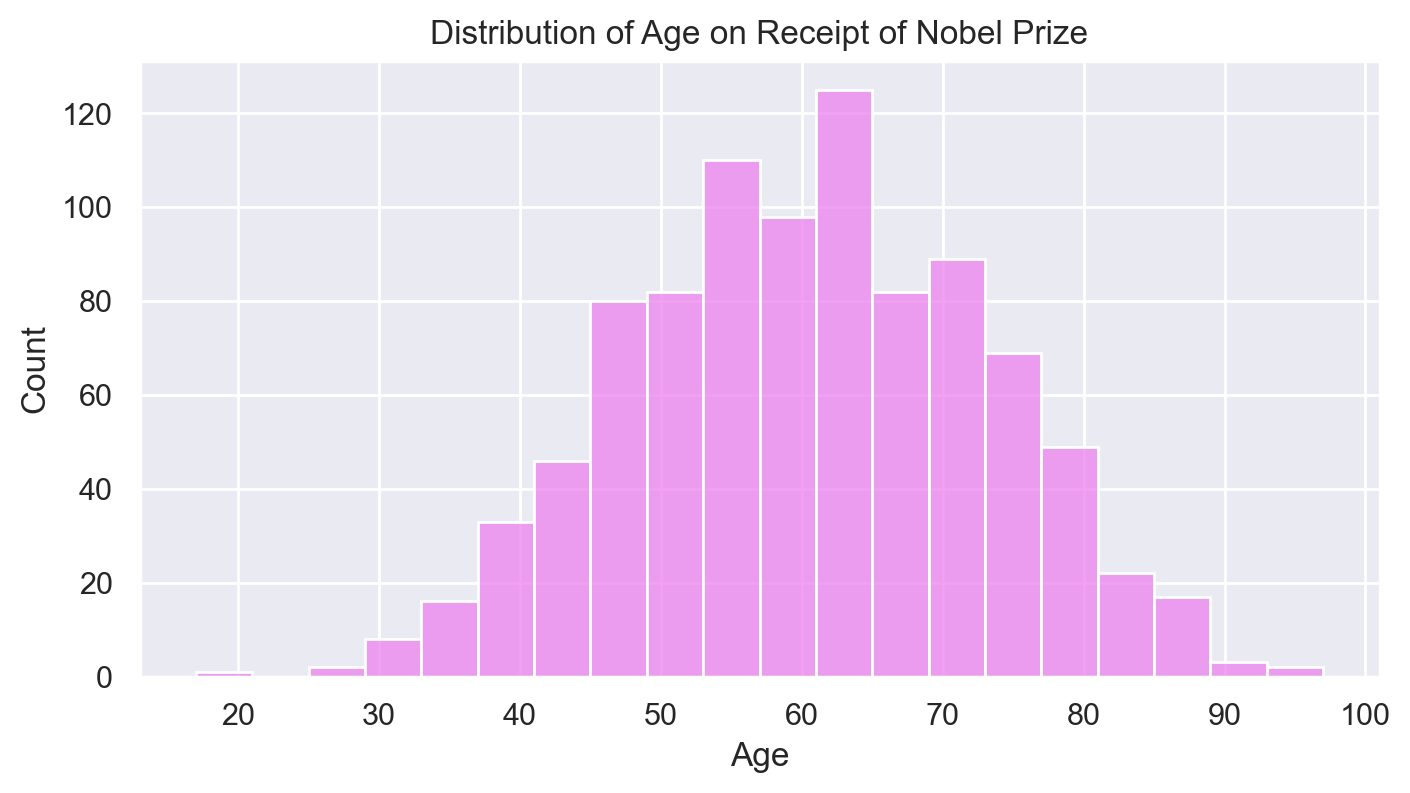

In [662]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df,
             x=df['winning_age'],
             bins=20,
            color='violet')
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Nobel Prize')
plt.show()

### Plot of the Winning Age and the corresponding year of winning

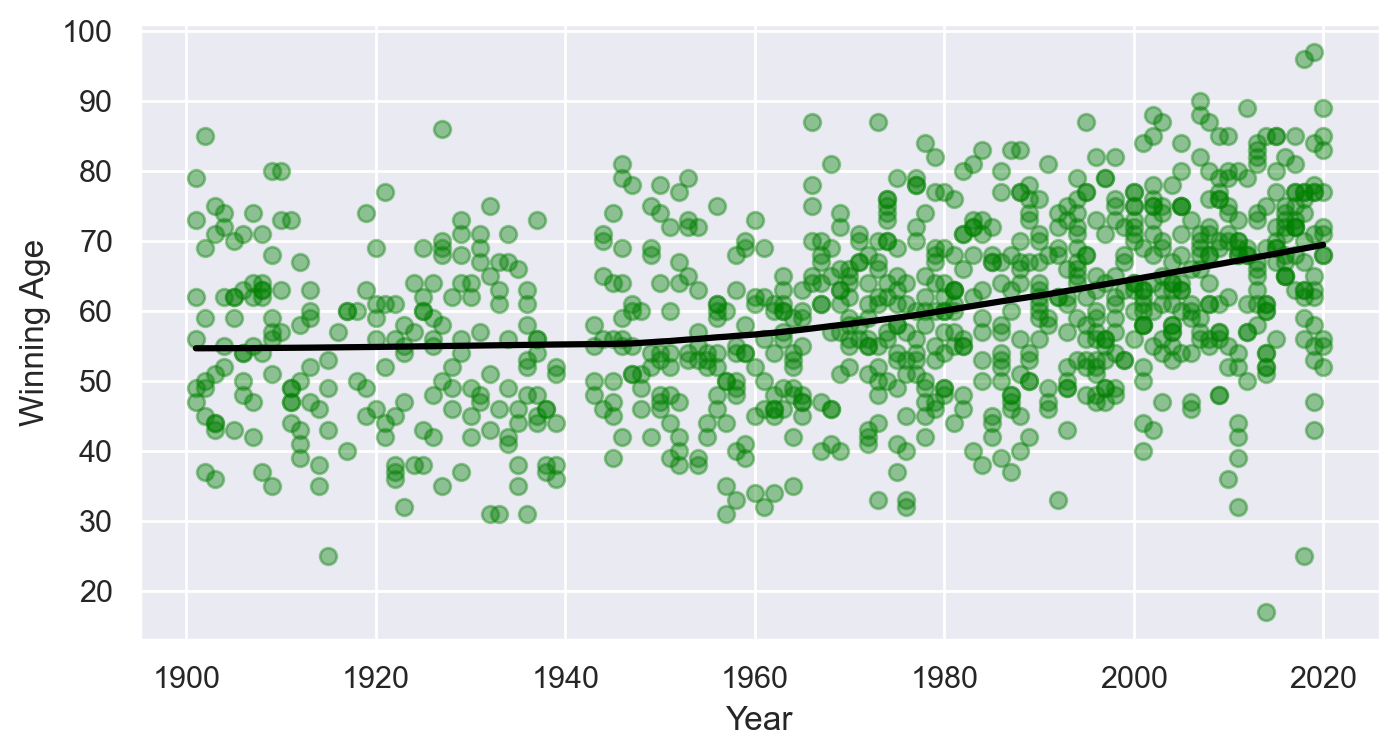

In [663]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    sns.regplot(data=df,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4, 'color':'green'},
                line_kws={'color': 'black'})

plt.xlabel('Year')
plt.ylabel('Winning Age')
plt.show()

### Plotting for each category using Seaborn's lmplot

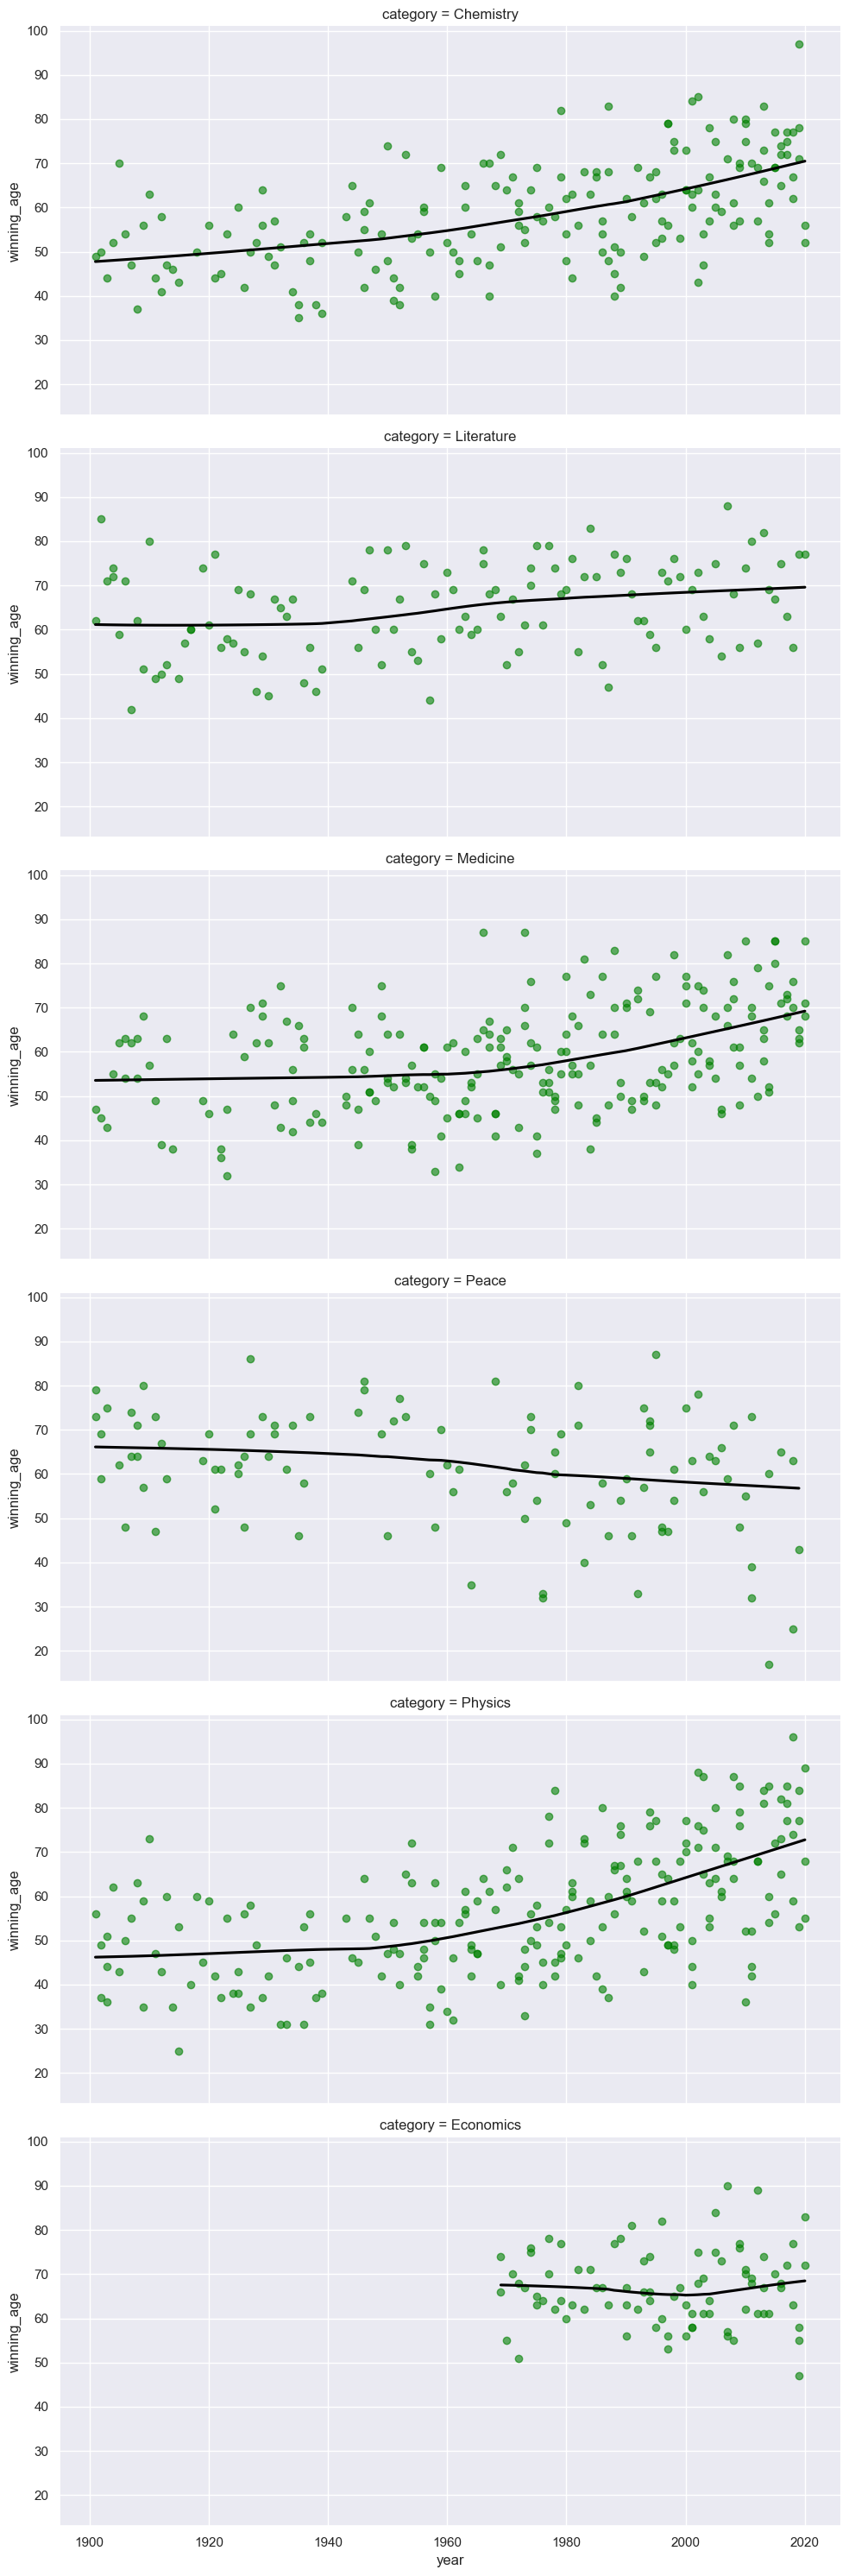

In [664]:
sns.lmplot(data=df,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6, 'color':'green'},
               line_kws = {'color': 'black'},)

plt.show()

### Winning Age Across the Nobel Prize Categories

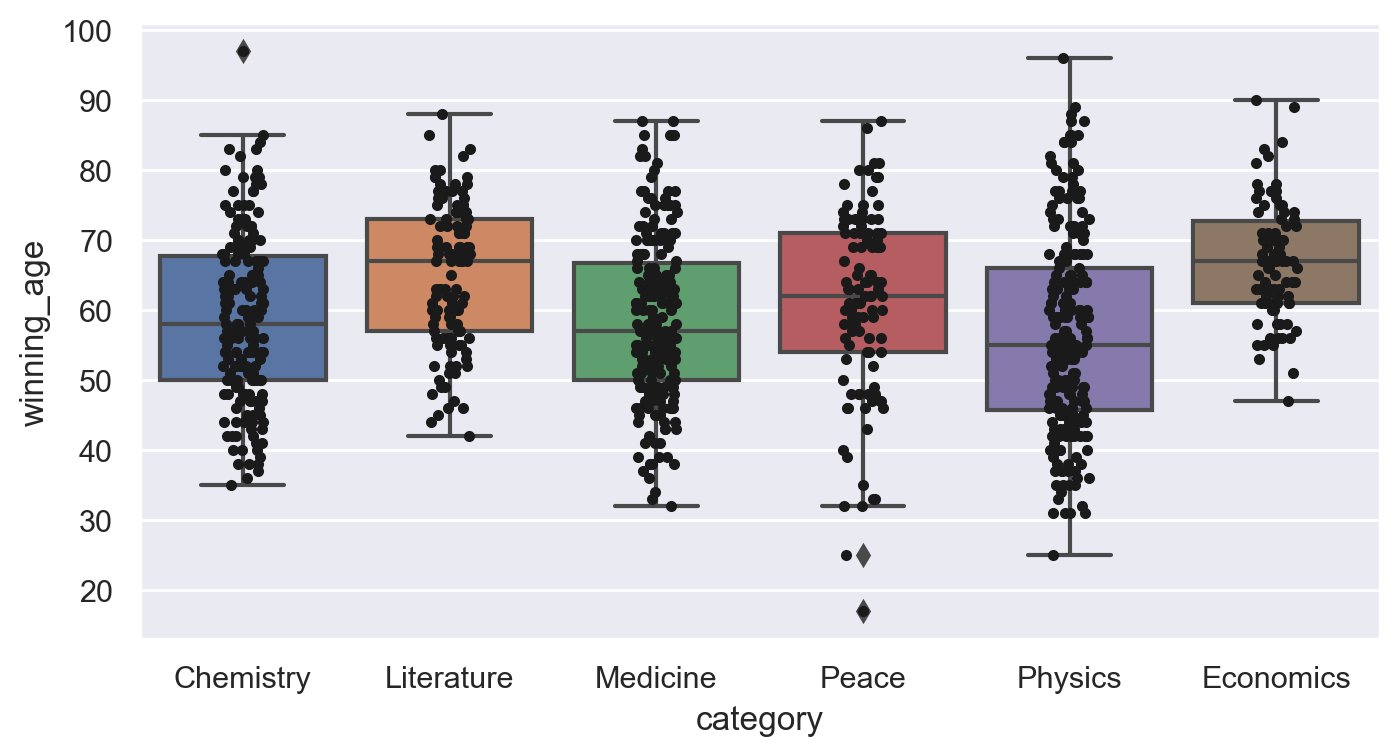

In [665]:
plt.figure(figsize=(8,4), dpi=200)
sns.boxplot(data=df, x='category', y='winning_age')

sns.stripplot(df, x='category', y='winning_age', size=4, color=".1")

plt.show()

The average age is higher for Literature and Economics, with the maximum age in Physics.

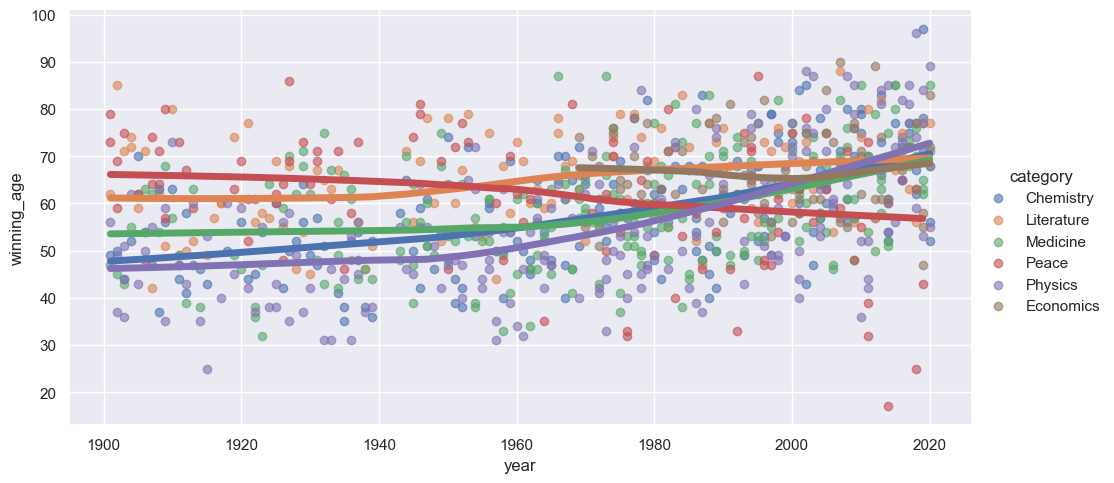

In [666]:
import warnings
warnings.filterwarnings('ignore')

sns.lmplot(data=df,
               x='year', 
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'linewidth': 5},)
plt.show()

### What is the main contribution of the Nobel Winners

In [667]:
data2 = data.copy()
data2.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


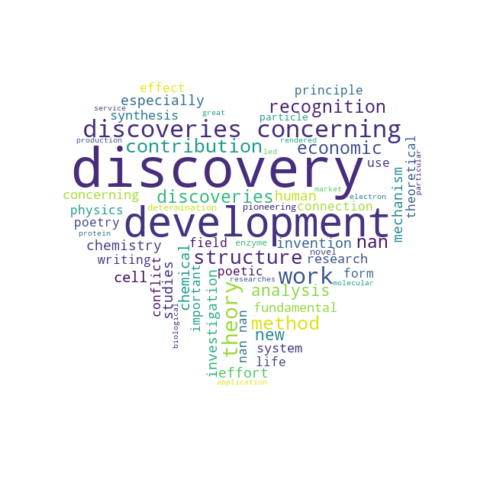

In [668]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from io import BytesIO
import requests

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data2['motivation']:
     
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
# From URL
response = requests.get("https://raw.githubusercontent.com/R-CoderDotCom/samples/main/wordcloud-mask.jpg")
mask = np.array(Image.open(BytesIO(response.content)))
 
wc = WordCloud(width = 300, height = 300,
                background_color ='white',
                      colormap = 'viridis',
                stopwords = stopwords,
                min_font_size = 10, 
               #max_words = 50,
              #repeat = True, 
               mask = mask)

wordcloud = wc.generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (5, 8), facecolor = None)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 1)
 
#plt.show()

plt.savefig("wordcloud.png", dpi=300, #dpi makes the image of a higher quality
           transparent = False,
           bbox_inches="tight") #true will create a transparent image #save figure

# Credits for the WordCloud: 
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://python-charts.com/ranking/wordcloud-matplotlib/

Credit: https://www.udemy.com/course/100-days-of-code/learn/lecture/22861869#overview